In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
df=pd.read_csv('Churn_Modelling.csv')

In [24]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [57]:
df=df.drop('RowNumber',axis=1)

In [58]:
df=df.drop('CustomerId',axis=1)
df=df.drop('Surname',axis=1)

<Axes: xlabel='Geography', ylabel='count'>

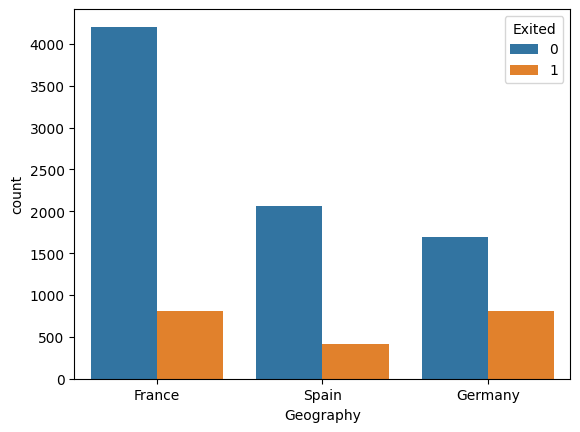

In [23]:
sns.countplot(x=df['Geography'],hue=df['Exited'])

<Axes: xlabel='Gender', ylabel='count'>

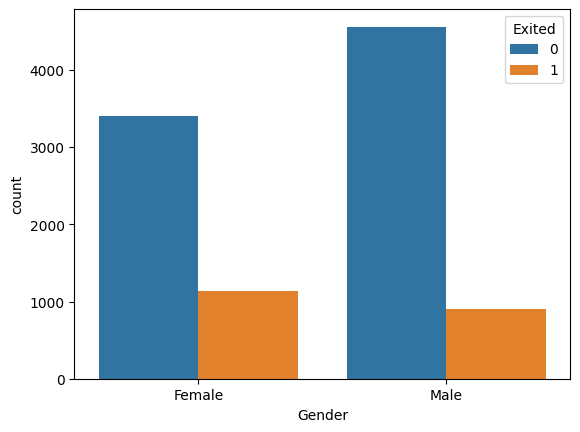

In [25]:
sns.countplot(x=df['Gender'],hue=df['Exited'])

In [30]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [59]:
df=pd.get_dummies(df,drop_first=True)

In [60]:
df=df.astype(int)

In [61]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [62]:
dff=df.corr()['Exited']

In [44]:
dff.abs().sort_values(ascending=False)

Exited               1.000000
Age                  0.285323
Geography_Germany    0.173488
IsActiveMember       0.156128
Balance              0.118533
Gender_Male          0.106512
Geography_Spain      0.052667
NumOfProducts        0.047820
CreditScore          0.027094
Tenure               0.014001
EstimatedSalary      0.012097
HasCrCard            0.007138
Name: Exited, dtype: float64

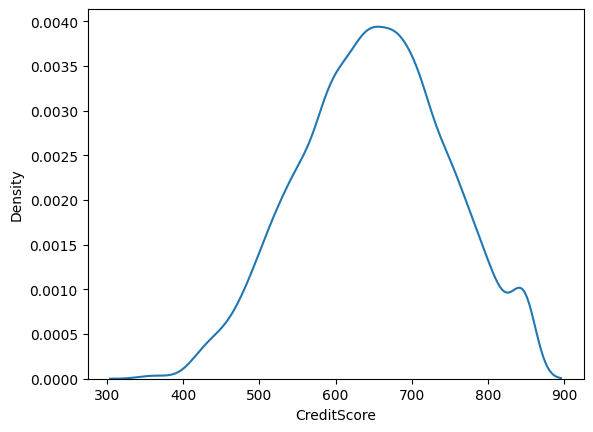

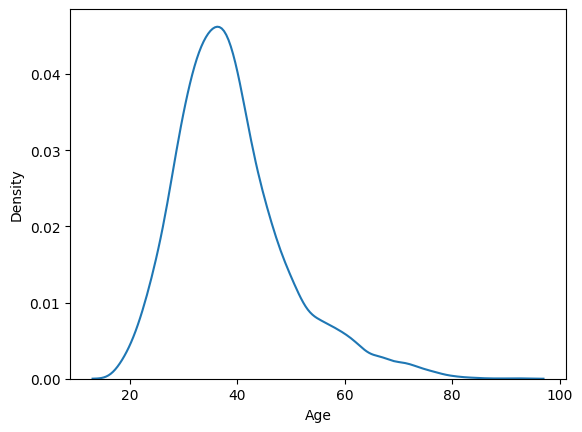

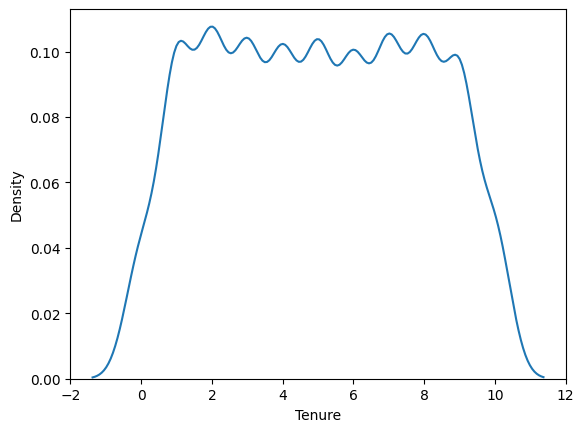

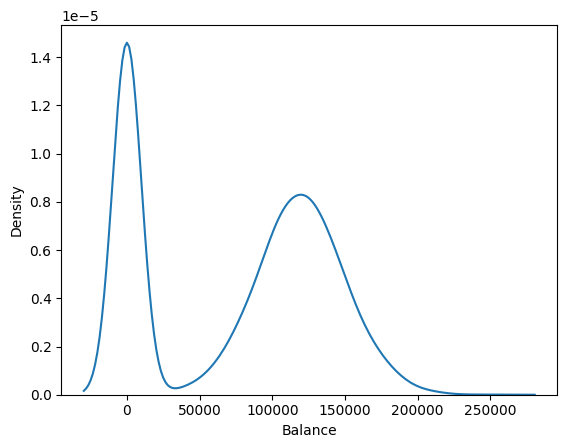

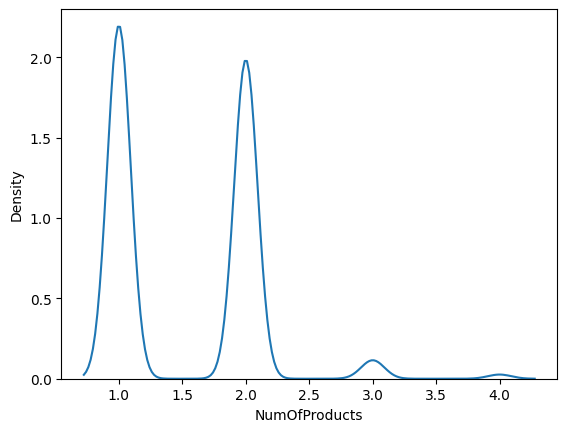

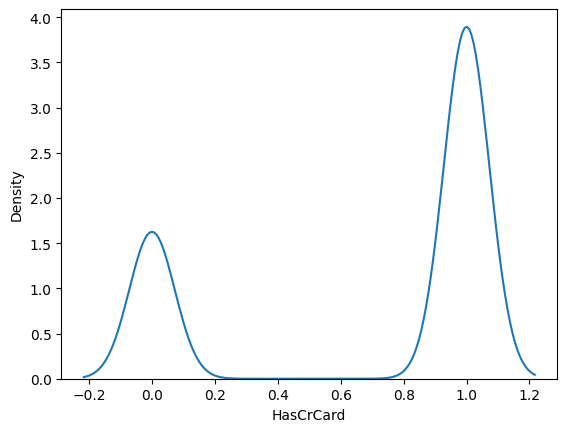

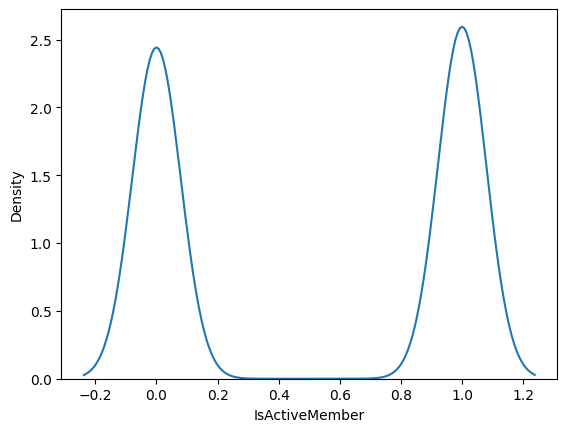

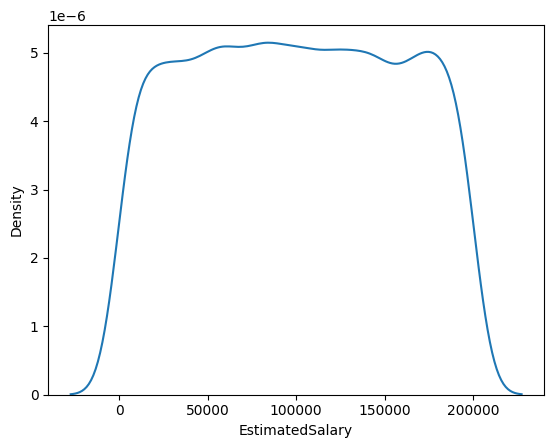

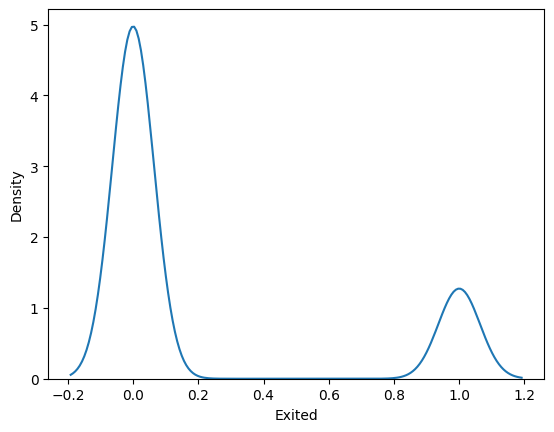

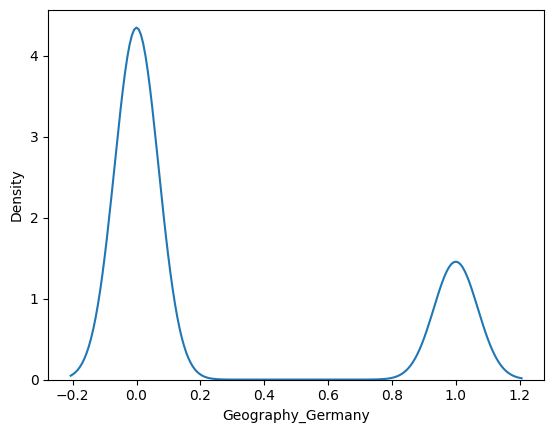

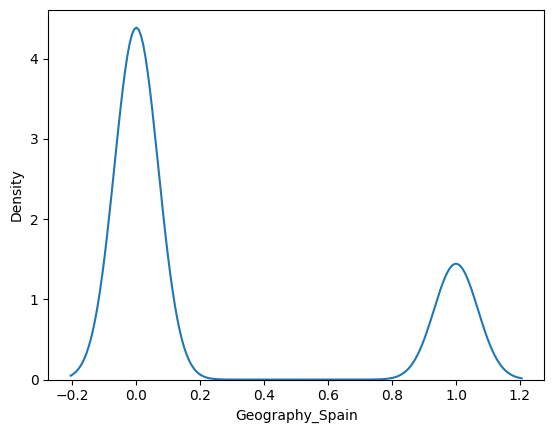

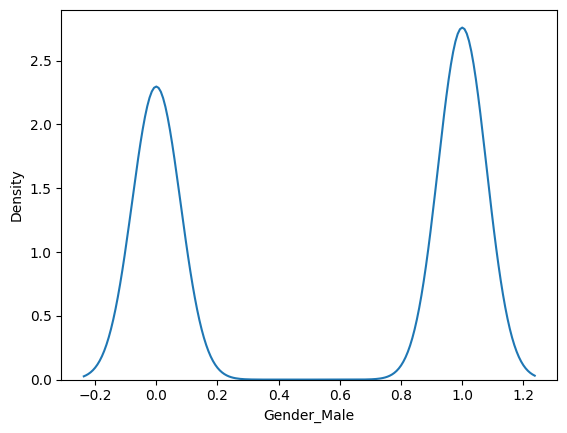

In [63]:
for i in df.columns:
    sns.kdeplot(df[i],label=i)
    plt.show()

In [53]:
from scipy.stats import skew

In [64]:
df.skew()

CreditScore         -0.071607
Age                  1.011320
Tenure               0.010991
Balance             -0.141106
NumOfProducts        0.745568
HasCrCard           -0.901812
IsActiveMember      -0.060437
EstimatedSalary      0.002085
Exited               1.471611
Geography_Germany    1.149340
Geography_Spain      1.169106
Gender_Male         -0.183596
dtype: float64

In [65]:
from scipy.stats import zscore

In [66]:
score=np.abs(zscore(df))

In [67]:
out=(score>3).sum(axis=0)

In [68]:
out

CreditScore            8
Age                  133
Tenure                 0
Balance                0
NumOfProducts         60
HasCrCard              0
IsActiveMember         0
EstimatedSalary        0
Exited                 0
Geography_Germany      0
Geography_Spain        0
Gender_Male            0
dtype: int64

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
x=df.drop('Exited',axis=1)
y=df['Exited']

In [129]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [323]:
rf=RandomForestClassifier(n_estimators=22,class_weight='balanced',max_depth=7,max_samples=0.4)

In [324]:
rf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, max_samples=0.4,
                       n_estimators=22)

In [340]:
y_probs = rf.predict_proba(x_test)[:, 1]
y_pred_new = (y_probs > 0.412).astype(int)

In [164]:
y_pred=rf.predict(x_test)

In [250]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score

In [341]:
accuracy_score(y_test,y_pred_new)

0.7635

In [342]:
confusion_matrix(y_test,y_pred_new)

array([[1223,  393],
       [  80,  304]], dtype=int64)

In [343]:
precision_score(y_test,y_pred_new)

0.43615494978479197

In [344]:
recall_score(y_test,y_pred_new)

0.7916666666666666

In [345]:
import joblib

In [346]:
joblib.dump(rf,'Churn_model.pkl')

['Churn_model.pkl']